<a href="https://colab.research.google.com/github/disha318/Airdrums/blob/main/Week_1/Assignment_2/Disha_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def generate_noisy_sine_wave(freq, amplitude, noise_level, num_samples):
    t = np.linspace(0, 1, num_samples)
    clean_signal = amplitude * np.sin(2 * np.pi * freq * t)
    noise = np.random.normal(scale=noise_level, size=num_samples)
    noisy_signal = clean_signal + noise
    return noisy_signal

In [7]:
# Parameters
frequency = 5  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
noise_level = 0.5  # Level of noise to add to the sine wave
num_samples = 1000  # Number of samples in the sine wave

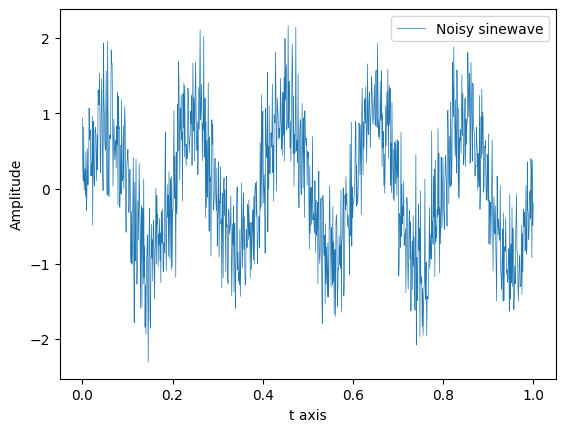

In [16]:
nsignal= generate_noisy_sine_wave(frequency,amplitude,noise_level,num_samples)
threshold=100
t= np.linspace(0, 1, num_samples)
plt.plot(t,nsignal,linewidth=0.5,label='Noisy sinewave')
plt.xlabel('t axis')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [10]:
# Making an array's length a power of two
def forfft(arr):
    s = len(arr)
    desired_s = 1

    while(desired_s < s):
        desired_s *= 2

    for i in range(desired_s - s):
        arr.append(0)

In [13]:
def fft(arr):
    # For a recursive implementation of the 1D Cooley-Tukey FFT, the input should have a length of power of 2.
    n = len(arr)
    #base case
    if n == 1:
        return arr
    else:
        #dividing signal into even and odd-indexed elements
        arr_even = fft(arr[::2])
        arr_odd = fft(arr[1::2])
        # performing FFT on even and odd parts separately
        t = np.exp(-2j*np.pi*np.arange(n)/ n)
        # combining the result
        x = np.concatenate([arr_even+t[:int(n/2)]*arr_odd,arr_even+t[int(n/2):]*arr_odd])
        return x

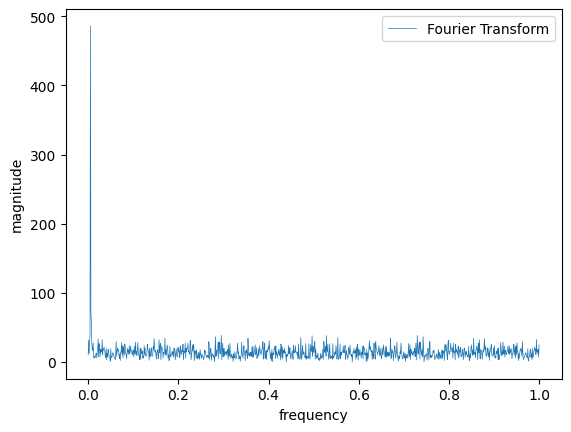

In [21]:
#To convert noisy signal into array
noisy_arr = list(nsignal)
forfft(noisy_arr)
narr=fft(noisy_arr)
marr= []
for i in range(num_samples):
        marr.append(abs(narr[i]))
#plotting fourier transform
plt.plot(t,marr,linewidth=0.5,label='Fourier Transform')
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.legend()
plt.show()


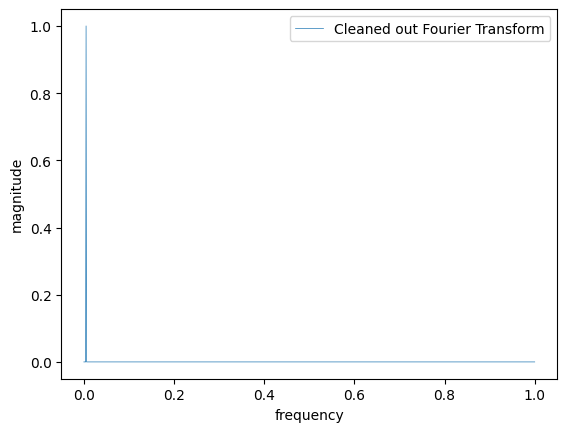

In [22]:
#To clean fourier transform
c_arr=[]
for i in range(num_samples):
        if marr[i] > threshold:
            c_arr.append(1)
        else:
            c_arr.append(0)
#plotting cleaned fourier transform
plt.plot(t,c_arr,linewidth=0.5, label='Cleaned out Fourier Transform')
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.legend()
plt.show()

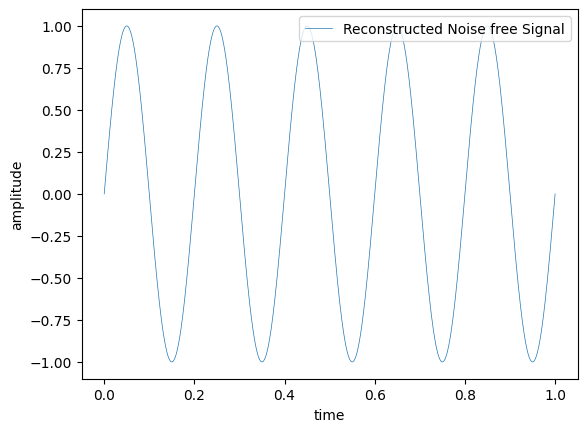

In [24]:
#Reform clean signal from fourier transform
noisefree_signal=0
for i in range(num_samples):
    if c_arr[i] != 0:
       noisefree_signal += c_arr[i] * np.sin(2 * np.pi * i * t)
#plotting noise free signal
plt.plot(t,noisefree_signal, linewidth=0.5,label='Reconstructed Noise free Signal')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend(loc='upper right')
plt.show()

In [27]:
def goertzel(signal, target_freq, sample_rate):
    #Computing the Goertzel algorithm to calculate the DFT at a specific frequency.Returns complex: DFT value at the target frequency.

    N = len(signal)
    k = int(0.5 + N * target_freq / sample_rate)
    w = 2.0 * np.pi * k / N
    cosine = np.cos(w)
    sine = np.sin(w)
    coeff = 2.0 * cosine
    s1 = 0
    s2 = 0
    for i in range(N):
        s0 = coeff * s1 - s2 + signal[i]
        s2 = s1
        s1 = s0
    real = s1 - s2 * cosine
    imaginary = s2 * sine
    return complex(real, imaginary)

# Defining the input array
x = np.array([1, 1, 1, 1, 0, 0, 0, 0])

sample_rate = 1  # Since discrete samples

# Compute the DFT using Goertzel algorithm for each frequency
dft_results = []
for freq_index in range(len(x)):
    dft_val = goertzel(x, freq_index, sample_rate)
    dft_results.append(dft_val)

# Print the DFT results
print("DFT results:", dft_results)


DFT results: [(4+0j), (4-5.3884459162483544e-15j), (4-1.0776891832496709e-14j), (4-1.6165337748745062e-14j), (4-2.1553783664993418e-14j), (4-2.694222958124177e-14j), (4-3.2330675497490123e-14j), (4-3.7719121413738476e-14j)]
